# Introduction
This project is one where we use data and data parsing to create an evidence based argument for the best neighborhood in Pittsburgh. We created our metric based on the datasets that we found and liked. We settled on crime data, population data, and tree data for our datasets and with those selected we looked for a way to combine them into one metric. In the end we settled on general quality of life. 

One alternative we explored was using a dataset on income per household instead of population data but the dataset was not clear enough and so we switched to focusing on population data.

# The Metric
Our chosen metric is general quality of life. We combine crime data, population data, and data about the trees in Pittsburgh to find the best neighborhood. The neighborhood with the best combination of low crime, high population, and good benefits from trees will be crowned the best neighborhood in Pittsburgh.

# The Best Neighborhood
Applying the metric

In [1]:
import pandas as pd
import geopandas
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'geopandas'

# 1) *The Trees*

In [2]:
trees = pd.read_csv("https://data.wprdc.org/datastore/dump/1515a93c-73e3-4425-9b35-1cd11b2196da")

C:\Users\isaac\anaconda3\envs\cmpinf0010\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


This code simply reads in the dataset

In [3]:
treesByNeighborhood = trees.groupby('neighborhood')

TreesByNeighborhood now holds the GroupBy object for the dataset when it has been grouped by the "neighborhood" category. This will make it easier to parse the data with that grouping in the future, since this object can be used instead of remaking it everytime.

In [5]:
neighborhood_points = {}
np1 = {}
np2 = {}
np3 = {}
np4 = {}
np5 = {}
np6 = {}
np7 = {}
np8 = {}
for neighborhood in trees['neighborhood'].unique():
    neighborhood_points[neighborhood] = 0
    np1[neighborhood] = 0
    np2[neighborhood] = 0
    np3[neighborhood] = 0
    np4[neighborhood] = 0
    np5[neighborhood] = 0
    np6[neighborhood] = 0
    np7[neighborhood] = 0
      
points = pd.Series(neighborhood_points)

This code sets up the dictionaries and series that will be used to keep track of the scores going forward. The points series will hold the running tally of the combined points while the dictionaries will hold the points for the individual categories. This will make it easier to graph and see how different categories affected the scoring, and who wins in the end.

In [7]:
avgOverallBenefitsDollarValue = treesByNeighborhood['overall_benefits_dollar_value'].mean()
print(avgOverallBenefitsDollarValue)
print()
sortedAvgOverallBenefitsDollarValue = avgOverallBenefitsDollarValue.sort_values()
print(sortedAvgOverallBenefitsDollarValue)
print()

neighborhood
Allegheny Center       171.791881
Allegheny West         149.084659
Allentown              120.451284
Arlington               71.204809
Arlington Heights      218.471558
                          ...    
Upper Lawrenceville    111.307346
West End                82.564056
West Oakland            76.122696
Westwood               126.776044
Windgap                135.477024
Name: overall_benefits_dollar_value, Length: 90, dtype: float64

neighborhood
Troy Hill                 43.015155
South Shore               45.616670
Polish Hill               65.607477
Central Lawrenceville     66.689438
Strip District            69.347687
                            ...    
St. Clair                170.079518
Allegheny Center         171.791881
Hays                     181.397515
Fairywood                207.420886
Arlington Heights        218.471558
Name: overall_benefits_dollar_value, Length: 90, dtype: float64



This code shows the basic format that will be used for getting winners of the individual categories. As stated eariler, TreesByNeighborhood holds the GroupBy object for the dataset with regards to the "neighborhood" column so all this code does is it grabs a specific property column that is currently being tested and then calculates the mean for that, and since it was Grouped By neighborhood that occurs for each neighborhood. Then those values are sorted using the sort_values() function and the result is stored into a new variable. This makes it relatively easy to then get the points for each neighborhood and update the relevant Series and dictionary.

In [8]:
for i in range(len(sortedAvgOverallBenefitsDollarValue)):
    neighborhood = sortedAvgOverallBenefitsDollarValue.index[i]
    points.loc[neighborhood] += (i+1)
    np1[neighborhood] += (i+1)

points = points.sort_values()
print(points)

NaN                       0
Troy Hill                 1
South Shore               2
Polish Hill               3
Central Lawrenceville     4
                         ..
St. Clair                86
Allegheny Center         87
Hays                     88
Fairywood                89
Arlington Heights        90
Length: 91, dtype: int64


This code is the second part of the above structure. This utilizes the sorted data for the category, in this case "overall_benefits_dollar_value" to update the correct Series and dictionary. Then, after the loop has been run, the points are sorted again so that at any point it is easy to see what neighborhood is leading after a specific category.

According to this, the neighborhood that has the highest overall dollar value benefit from trees is Arlington Heights, followed by Fairywood and Hays, w/ Troy Hill coming in last.

In [9]:
avgStormWaterBenefitsDollarValue = treesByNeighborhood['stormwater_benefits_dollar_value'].mean()
sortedAvgStormWaterBenefitsDollarValue = avgStormWaterBenefitsDollarValue.sort_values()
print(sortedAvgStormWaterBenefitsDollarValue)
print()

for i in range(len(sortedAvgStormWaterBenefitsDollarValue)):
    neighborhood = sortedAvgStormWaterBenefitsDollarValue.index[i]
    points.loc[neighborhood] += (i+1)
    np2[neighborhood] += (i+1)

points = points.sort_values()
print(points)

neighborhood
Troy Hill                 1.595947
South Shore               2.219668
Strip District            2.929244
Glen Hazel                3.017582
Central Lawrenceville     3.179640
                           ...    
Stanton Heights          16.002401
Allegheny Center         17.628934
Squirrel Hill North      17.844550
Fairywood                19.217809
Arlington Heights        19.794012
Name: stormwater_benefits_dollar_value, Length: 90, dtype: float64

NaN                        0
Troy Hill                  2
South Shore                4
Strip District             8
Central Lawrenceville      9
                        ... 
Stanton Heights          171
Squirrel Hill North      172
Allegheny Center         174
Fairywood                178
Arlington Heights        180
Length: 91, dtype: int64


This code continues with the above structure. This category is "Stormwater Benefits Dollar Value" and the winner is again Arlington Heights with Fairywood comming in a close second.

In [10]:
avgPropertyValueBenefitsDollarValue = treesByNeighborhood['property_value_benefits_dollarvalue'].mean()

sortedAvgPropertyValueBenefitsDollarValue = avgPropertyValueBenefitsDollarValue.sort_values()
print(sortedAvgPropertyValueBenefitsDollarValue)
print()

for i in range(len(sortedAvgPropertyValueBenefitsDollarValue)):
    neighborhood = sortedAvgPropertyValueBenefitsDollarValue.index[i]
    points.loc[neighborhood] += (i+1)
    np3[neighborhood] += (i+1)

points = points.sort_values()
print(points)

neighborhood
South Shore          22.573185
Troy Hill            27.975704
Glen Hazel           32.216968
Arlington            32.517351
Bedford Dwellings    35.812836
                       ...    
Northview Heights    71.809458
Fairywood            82.365462
Arlington Heights    82.572301
St. Clair            83.141304
Hays                 97.391293
Name: property_value_benefits_dollarvalue, Length: 90, dtype: float64

NaN                        0
Troy Hill                  4
South Shore                5
Central Lawrenceville     17
Glen Hazel                17
                        ... 
Squirrel Hill North      251
Stanton Heights          255
Allegheny Center         257
Fairywood                265
Arlington Heights        268
Length: 91, dtype: int64


In this category, "Property Value Benefits Dollar Value", there was a new winner, Hays. St. Clair took second but the front runner from the first two categories, Arlington Heights and Fairywood still placed high.

In [11]:
avgEnergyBenefitsElectricityDollarValue = treesByNeighborhood['energy_benefits_electricity_dollar_value'].mean()

sortedAvgEnergyBenefitsElectricityDollarValue = avgEnergyBenefitsElectricityDollarValue.sort_values()
print(sortedAvgEnergyBenefitsElectricityDollarValue)
print()

for i in range(len(sortedAvgEnergyBenefitsElectricityDollarValue)):
    neighborhood = sortedAvgEnergyBenefitsElectricityDollarValue.index[i]
    points.loc[neighborhood] += (i+1)
    np4[neighborhood] += (i+1)

points = points.sort_values()
print(points)

neighborhood
Troy Hill                 2.196487
South Shore               3.347975
Strip District            3.915382
Central Lawrenceville     4.300676
Polish Hill               4.331904
                           ...    
Allegheny Center         16.484859
Squirrel Hill North      16.614868
Hays                     17.380035
Fairywood                20.938710
Arlington Heights        23.123244
Name: energy_benefits_electricity_dollar_value, Length: 90, dtype: float64

NaN                        0
Troy Hill                  5
South Shore                7
Central Lawrenceville     21
Strip District            21
                        ... 
Squirrel Hill North      338
Stanton Heights          340
Allegheny Center         343
Fairywood                354
Arlington Heights        358
Length: 91, dtype: int64


Arlington Heights and Fairywood return to their place at the top for the category that accounts for the Benefit in Dollar Value that the trees bring for Electrical energy.

In [12]:
avgEnergyBenefitsGasDollarValue = treesByNeighborhood['energy_benefits_gas_dollar_value'].mean()

sortedAvgEnergyBenefitsGasDollarValue = avgEnergyBenefitsGasDollarValue.sort_values()
print(sortedAvgEnergyBenefitsGasDollarValue)
print()

for i in range(len(sortedAvgEnergyBenefitsGasDollarValue)):
    neighborhood = sortedAvgEnergyBenefitsGasDollarValue.index[i]
    points.loc[neighborhood] += (i+1)
    np5[neighborhood] += (i+1)

points = points.sort_values()
print(points)

neighborhood
Troy Hill                 9.730602
South Shore              14.820347
Strip District           16.880436
Polish Hill              17.456228
Central Lawrenceville    17.762704
                           ...    
Allegheny Center         56.311834
Squirrel Hill North      56.749641
Hays                     59.185833
Fairywood                71.141289
Arlington Heights        80.952776
Name: energy_benefits_gas_dollar_value, Length: 90, dtype: float64

NaN                        0
Troy Hill                  6
South Shore                9
Strip District            24
Central Lawrenceville     26
                        ... 
Squirrel Hill North      425
Stanton Heights          425
Allegheny Center         429
Fairywood                443
Arlington Heights        448
Length: 91, dtype: int64


Once again, Arlington Heights and Fairywood take the top two spots in the category, which is "Energy Benefits Gas Dollar Value".

In [13]:
avgAirQualityBenefitsTotalDollarValue = treesByNeighborhood['air_quality_benfits_total_dollar_value'].mean()

sortedAvgAirQualityBenefitsTotalDollarValue = avgAirQualityBenefitsTotalDollarValue.sort_values()
print(sortedAvgAirQualityBenefitsTotalDollarValue)
print()

for i in range(len(sortedAvgAirQualityBenefitsTotalDollarValue)):
    neighborhood = sortedAvgAirQualityBenefitsTotalDollarValue.index[i]
    points.loc[neighborhood] += (i+1)
    np6[neighborhood] += (i+1)

points = points.sort_values()
print(points)

neighborhood
Troy Hill               1.352139
Glen Hazel              1.675595
Hays                    1.699988
South Shore             2.380994
Strip District          2.654869
                         ...    
Arlington Heights      10.919397
Stanton Heights        11.081593
Fairywood              12.010863
Squirrel Hill North    12.405917
Allegheny Center       12.454126
Name: air_quality_benfits_total_dollar_value, Length: 90, dtype: float64

NaN                        0
Troy Hill                  7
South Shore               13
Strip District            29
Central Lawrenceville     33
                        ... 
Stanton Heights          512
Squirrel Hill North      514
Allegheny Center         519
Fairywood                531
Arlington Heights        534
Length: 91, dtype: int64


When comparing the Air Quality Benefits of trees however, Allegheny Center and Squirrel Hill North are the top two seeds, rather than Arlington Heights (which placed 5th) and Fairywood (which still placed 3rd).

In [14]:
avgco2BenefitsDollarValue = treesByNeighborhood['co2_benefits_dollar_value'].mean()

sortedAvgco2BenefitsDollarValue = avgco2BenefitsDollarValue.sort_values()
print(sortedAvgco2BenefitsDollarValue)
print()

for i in range(len(sortedAvgco2BenefitsDollarValue)):
    neighborhood = sortedAvgco2BenefitsDollarValue.index[i]
    points.loc[neighborhood] += (i+1)
    np7[neighborhood] += (i+1)

points = points.sort_values()
print(points)

neighborhood
Hays                   0.131869
Troy Hill              0.164276
Glen Hazel             0.176771
South Shore            0.274502
Strip District         0.356172
                         ...   
Stanton Heights        1.497696
Chartiers City         1.519679
Allegheny Center       1.591425
Squirrel Hill North    1.596545
Fairywood              1.746754
Name: co2_benefits_dollar_value, Length: 90, dtype: float64

NaN                        0
Troy Hill                  9
South Shore               17
Strip District            34
Central Lawrenceville     40
                        ... 
Stanton Heights          598
Squirrel Hill North      603
Allegheny Center         607
Arlington Heights        607
Fairywood                621
Length: 91, dtype: int64


In the very last category, Fairywood takes top honors, while Squirrel Hill North and Allegheny Center continue to perform well. Surprisingly Arlington Heights is places very poorly.

In [15]:
points1 = pd.Series(np1)
points2 = pd.Series(np2)
points3 = pd.Series(np3)
points4 = pd.Series(np4)
points5 = pd.Series(np5)
points6 = pd.Series(np6)
points7 = pd.Series(np7)
graphingPointsDict = {'Final Ranking':points, 'OverallBenefits$':points1, 'StormwaterBenefits$': points2, 'PropertyValueBenefits$':points3, 
                     'EnergyBenefitsElectricity$':points4, 'EnergyBenefitsGas$':points5, 'AirQualityBenefits$': points6,
                     'co2Benefits$':points7}
graphingPoints = pd.DataFrame(graphingPointsDict)
print(graphingPoints)

                       Final Ranking  OverallBenefits$  StormwaterBenefits$  \
NaN                                0                 0                    0   
Troy Hill                          9                 1                    1   
South Shore                       17                 2                    2   
Strip District                    34                 5                    3   
Central Lawrenceville             40                 4                    5   
...                              ...               ...                  ...   
Stanton Heights                  598                85                   86   
Squirrel Hill North              603                84                   88   
Allegheny Center                 607                87                   87   
Arlington Heights                607                90                   90   
Fairywood                        621                89                   89   

                       PropertyValueBenefits$  Ener

This code pulls together the gathered points and creates a new DataFrame that makes it easier to see patterns. Each of the dictionaries that was collecting the points for the individual categories are converted into a larger dictionary with labelled columns and then that is turned into the DataFrame. Final Ranking is the first column in the DataFrame because that way the neighborhoods are sorted according to where they ended up in the final rankings. 

In [16]:
top5 = graphingPoints.tail(5)
top5

,Final Ranking,OverallBenefits$,StormwaterBenefits$,PropertyValueBenefits$,EnergyBenefitsElectricity$,EnergyBenefitsGas$,AirQualityBenefits$,co2Benefits$
Stanton Heights,598,85,86,84,85,85,87,86
Squirrel Hill North,603,84,88,79,87,87,89,89
Allegheny Center,607,87,87,83,86,86,90,88
Arlington Heights,607,90,90,88,90,90,86,73
Fairywood,621,89,89,87,89,89,88,90


This code just grabs the final 5 rows of the graphingPoints DataFrame because those five rows were the five neighborhoods that had the best score and by focusing on just the top 5 neighborhoods it is easier to graph and to determine which categories had the most impact on the final ranking.

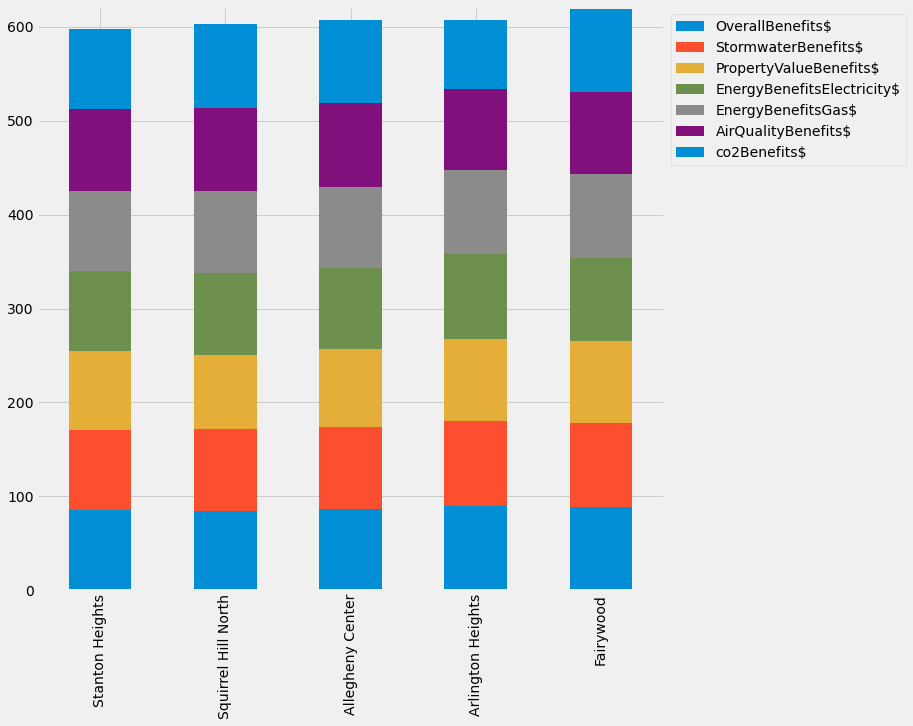

In [17]:
topScore = top5.iloc[4].iloc[0]
plt.style.use('fivethirtyeight')
top5.iloc[:,1:].plot(kind='bar',stacked='true', ylim=[0,topScore], figsize=(10,10))
#use the iloc[:,1:] to avoid the final ranking column since that doesn't add much to the graph
plt.legend(bbox_to_anchor=(1,1))

What this graph shows is that despite Arlington Heights leading for most of the categories (in fact in placed 1st in 4 of the 7 categories) it performed dismally on the final criteria, co2 benefit in dollar value, and thus not only did it fail to win the Tree criteria but it actually tied for second.

# population

In [1]:
import pandas as pd
import geopandas
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("total-population.csv")
df = pd.DataFrame(data, columns= ['Neighborhood', 'Estimate; Total'])


this code reads the data in total-population.csv and then assigns the 2 columns Neighborhood and Estimate; Total to the variable df.  

In [3]:
groupby_max = df.groupby(['Estimate; Total']).max()
print (str(groupby_max))

                        Neighborhood
Estimate; Total                     
3.0                          Chateau
12.0                     South Shore
205.0                    North Shore
235.0                       West End
270.0                      St. Clair
...                              ...
10122.0                      Carrick
11336.0          Squirrel Hill North
13160.0                    Brookline
13562.0                    Shadyside
16042.0          Squirrel Hill South

[91 rows x 1 columns]


This will assign each piece of data to be arranged from least to greatest by the Estimate; Total.  

In [4]:
max_15 = groupby_max.tail(15)
min_15 = groupby_max.head(15)
middle1 = groupby_max.iloc[15:30, :]
middle2 = groupby_max.iloc [30: 45, :]
middle3 = groupby_max.iloc[45: 60, :]
middle4 = groupby_max.iloc[60:76, :]

assigned each data into groups of 15 so the data is legible on the graph.  Using .tail to grab the back 15 and .head to grab the first 15 and .iloc is used to splice the data in the middle to grab the data in between.

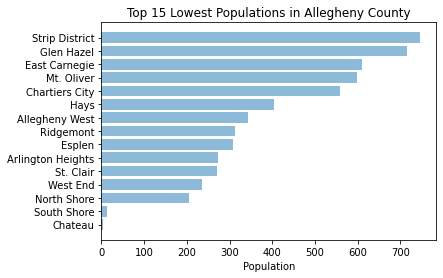

                      Neighborhood
Estimate; Total                   
3.0                        Chateau
12.0                   South Shore
205.0                  North Shore
235.0                     West End
270.0                    St. Clair
272.0            Arlington Heights
309.0                       Esplen
314.0                    Ridgemont
343.0               Allegheny West
405.0                         Hays
560.0               Chartiers City
598.0                   Mt. Oliver
610.0                East Carnegie
716.0                   Glen Hazel
747.0               Strip District


In [6]:
min_neighborhood = min_15['Neighborhood'].unique()
y_pos = np.arange(len(min_neighborhood))
min_total = [3.0, 12.0, 205.0, 235.0, 270.0, 272.0, 309.0, 314.0, 343.0, 405.0, 560.0, 598.0, 610.0, 716.0, 747.0]
plt.barh(y_pos, min_total, align = 'center', alpha = 0.5)
plt.yticks(y_pos, min_neighborhood)
plt.xlabel('Population')
plt.title('Top 15 Lowest Populations in Allegheny County')
plt.show()
print(min_15)

creating the graph and assigning it data with min_total and assigning x and y variables for hte graph

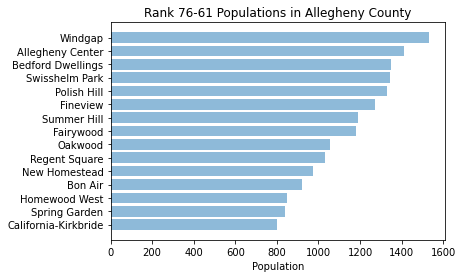

                         Neighborhood
Estimate; Total                      
803.0            California-Kirkbride
840.0                   Spring Garden
850.0                   Homewood West
920.0                         Bon Air
973.0                   New Homestead
1033.0                  Regent Square
1058.0                        Oakwood
1181.0                      Fairywood
1191.0                    Summer Hill
1270.0                       Fineview
1331.0                    Polish Hill
1345.0                 Swisshelm Park
1349.0              Bedford Dwellings
1411.0               Allegheny Center
1534.0                        Windgap


In [7]:
middle1_neighborhood = middle1['Neighborhood'].unique()
y_pos = np.arange(len(middle1_neighborhood))
middle1_total = [803.0, 840.0, 850.0, 920.0, 973.0, 1033.0, 1058.0, 1181.0, 1191.0, 1270.0, 1331.0, 1345.0, 1349.0, 1411.0, 1534]
plt.barh(y_pos, middle1_total, align = 'center', alpha = 0.5)
plt.yticks(y_pos, middle1_neighborhood)
plt.xlabel('Population')
plt.title('Rank 76-61 Populations in Allegheny County')
plt.show()
print(middle1)

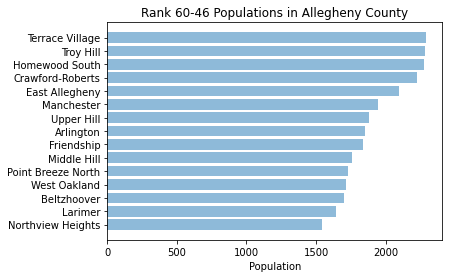

                       Neighborhood
Estimate; Total                    
1545.0            Northview Heights
1641.0                      Larimer
1702.0                  Beltzhoover
1717.0                 West Oakland
1732.0           Point Breeze North
1760.0                  Middle Hill
1840.0                   Friendship
1852.0                    Arlington
1884.0                   Upper Hill
1944.0                   Manchester
2095.0               East Allegheny
2225.0             Crawford-Roberts
2276.0               Homewood South
2283.0                    Troy Hill
2292.0              Terrace Village


In [8]:
middle2_neighborhood = middle2['Neighborhood'].unique()
y_pos = np.arange(len(middle2_neighborhood))
middle2_total = [1545.0, 1641.0, 1702.0, 1717.0, 1732.0, 1760.0, 1840.0, 1852.0, 1884.0, 1944.0, 2095.0, 2225.0, 2276.0, 2283.0, 2292.0]
plt.barh(y_pos, middle2_total, align = 'center', alpha = 0.5)
plt.yticks(y_pos, middle2_neighborhood)
plt.xlabel('Population')
plt.title('Rank 60-46 Populations in Allegheny County')
plt.show()
print(middle2)

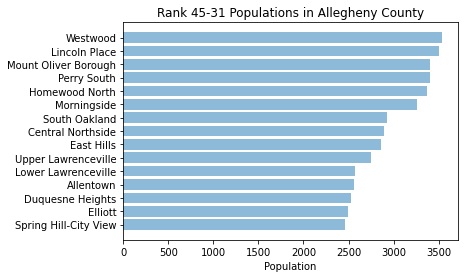

                          Neighborhood
Estimate; Total                       
2456.0           Spring Hill-City View
2491.0                         Elliott
2522.0                Duquesne Heights
2558.0                       Allentown
2572.0             Lower Lawrenceville
2754.0             Upper Lawrenceville
2859.0                      East Hills
2892.0               Central Northside
2921.0                   South Oakland
3262.0                     Morningside
3371.0                  Homewood North
3398.0                     Perry South
3399.0            Mount Oliver Borough
3499.0                   Lincoln Place
3537.0                        Westwood


In [9]:
middle3_neighborhood = middle3['Neighborhood'].unique()
y_pos = np.arange(len(middle3_neighborhood))
middle3_total = [2456.0, 2491.0, 2522.0, 2558.0, 2572.0, 2754.0, 2859.0, 2892.0, 2921.0, 3262.0, 3371.0, 3398.0, 3399.0, 3499.0, 3537.0]
plt.barh(y_pos, middle3_total, align = 'center', alpha = 0.5)
plt.yticks(y_pos, middle3_neighborhood)
plt.xlabel('Population')
plt.title('Rank 45-31 Populations in Allegheny County')
plt.show()
print(middle3)

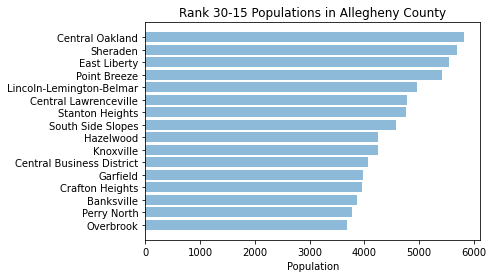

                              Neighborhood
Estimate; Total                           
3682.0                           Overbrook
3771.0                         Perry North
3858.0                          Banksville
3964.0                     Crafton Heights
3966.0                            Garfield
4060.0           Central Business District
4255.0                           Knoxville
4257.0                           Hazelwood
4583.0                   South Side Slopes
4761.0                     Stanton Heights
4775.0               Central Lawrenceville
4955.0            Lincoln-Lemington-Belmar
5414.0                        Point Breeze
5537.0                        East Liberty
5684.0                            Sheraden
5822.0                     Central Oakland


In [10]:
middle4_neighborhood = middle4['Neighborhood'].unique()
y_pos = np.arange(len(middle4_neighborhood))
middle4_total=[3682.0, 3771.0, 3858.0, 3964.0, 3966.0, 4060.0, 4255.0, 4257.0, 4583.0, 4761.0, 4775.0, 4955.0, 5414.0, 5537.0, 5684.0, 5822.0]
plt.barh(y_pos, middle4_total, align = 'center', alpha = 0.5)
plt.yticks(y_pos, middle4_neighborhood)
plt.xlabel('Population')
plt.title('Rank 30-15 Populations in Allegheny County')
plt.show()
print(middle4)

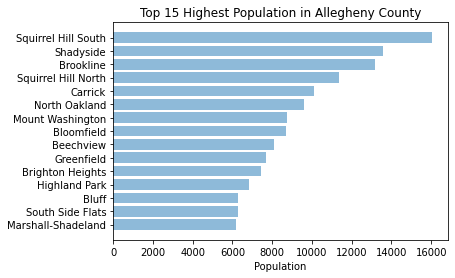

                        Neighborhood
Estimate; Total                     
6195.0            Marshall-Shadeland
6292.0              South Side Flats
6294.0                         Bluff
6810.0                 Highland Park
7421.0              Brighton Heights
7690.0                    Greenfield
8078.0                     Beechview
8669.0                    Bloomfield
8743.0              Mount Washington
9602.0                 North Oakland
10122.0                      Carrick
11336.0          Squirrel Hill North
13160.0                    Brookline
13562.0                    Shadyside
16042.0          Squirrel Hill South


In [11]:
max_neighborhood = max_15['Neighborhood'].unique()
y_pos = np.arange(len(max_neighborhood))
max_total = [6195.0, 6292.0, 6294.0, 6810.0, 7421.0, 7690.0, 8078.0, 8669.0, 8743.0, 9602.0, 10122.0, 11336.0, 13160.0, 13562.0, 16042.0]
plt.barh(y_pos, max_total, align = 'center', alpha = 0.5)
plt.yticks(y_pos, max_neighborhood)
plt.xlabel('Population')
plt.title('Top 15 Highest Population in Allegheny County')
plt.show()
print(max_15)

# Crime

Goal: is to determine the best neighborhood by checking the crime reports and to find the neighborhood with the least amount of crime.

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
#holds the data in the variable crime
crime = pd.read_csv("https://data.wprdc.org/datastore/dump/044f2016-1dfd-4ab0-bc1e-065da05fca2e")
#sorts the data variable by the neighborhoods
crimeByNeighborhoods = crime.groupby('INCIDENTNEIGHBORHOOD')
#prints the grouping out
print(crimeByNeighborhoods)
#counts the amount of numbers from the coloumns
crime_neighborhood = crime.count()
#displays all the recorded crime in the neighborhoods
print("Amount of total incidents for all neighborhoods:",crime_neighborhood['INCIDENTNEIGHBORHOOD'])
print("Amount of neighborhoods:",crime['INCIDENTNEIGHBORHOOD'].nunique())
print(crime['INCIDENTNEIGHBORHOOD'].unique())

Amount of total incidents for all neighborhoods: 234988
Amount of neighborhoods: 98
['North Shore' 'Upper Lawrenceville' 'Northview Heights'
 'Golden Triangle/Civic Arena' 'South Side Flats' 'Elliott'
 'Homewood North' 'South Side Slopes' 'Carrick' 'South Oakland' nan
 'Bloomfield' 'Beechview' 'Bluff' 'Strip District' 'Mount Washington'
 'East Carnegie' 'Crafton Heights' 'Marshall-Shadeland' 'East Liberty'
 'East Allegheny' 'Friendship' 'Arlington' 'Central Northside'
 'Spring Hill-City View' 'Brighton Heights' 'Westwood' 'East Hills'
 'Brookline' 'South Shore' 'Lower Lawrenceville' 'Bedford Dwellings'
 'Troy Hill-Herrs Island' 'Central Oakland' 'Garfield' 'West End'
 'West Oakland' 'Central Lawrenceville' 'Lincoln-Lemington-Belmar'
 'Sheraden' 'Beltzhoover' 'Outside City' 'Squirrel Hill South'
 'North Oakland' 'Allentown' 'Perry North' 'Homewood South' 'Shadyside'
 'Manchester' 'Squirrel Hill North' 'Regent Square' 'Homewood West'
 'Allegheny Center' 'Highland Park' 'Middle Hill' 'Ove

In [3]:
data = pd.read_csv("https://data.wprdc.org/datastore/dump/044f2016-1dfd-4ab0-bc1e-065da05fca2e")

In [4]:
#lists the amount of times incidents were reported, not exact numbers just how many rows each have
df = data.groupby('INCIDENTNEIGHBORHOOD')['INCIDENTTRACT'].nunique()
print(df)

INCIDENTNEIGHBORHOOD
Allegheny Center       82
Allegheny West         73
Allentown              90
Arlington              81
Arlington Heights      40
                       ..
Upper Lawrenceville     1
West End                1
West Oakland           63
Westwood               77
Windgap                48
Name: INCIDENTTRACT, Length: 98, dtype: int64


In [5]:
#lists the 50 lowest neighborhoods crime rate incidents reported
plot=crime['INCIDENTNEIGHBORHOOD'].value_counts().tail(50)
#lists the 48 highest crime rate incidents
plot2=crime['INCIDENTNEIGHBORHOOD'].value_counts().head(48)
print('50 lowest','\n',plot)
print('48 highest','\n',plot2)

50 lowest 
 Bedford Dwellings          1757
Chateau                    1746
South Oakland              1692
Outside City               1642
Overbrook                  1567
Manchester                 1562
Arlington                  1547
West Oakland               1427
Troy Hill                  1400
Beltzhoover                1398
Upper Hill                 1382
Stanton Heights            1361
Fineview                   1349
California-Kirkbride       1296
Friendship                 1254
Banksville                 1242
Westwood                   1229
Lincoln Place              1166
Upper Lawrenceville        1160
Morningside                1086
Terrace Village             935
Bon Air                     890
Allegheny West              881
West End                    861
South Shore                 859
Central Northside           786
Duquesne Heights            784
Polish Hill                 738
Spring Garden               679
Windgap                     604
St. Clair                   

Lowest crime rates AxesSubplot(0.125,0.125;0.775x0.755)


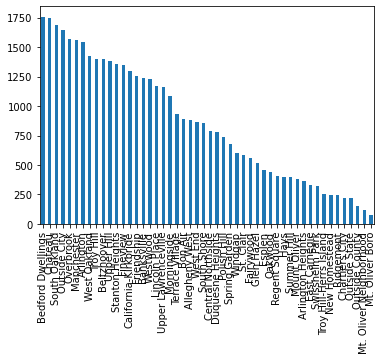

In [6]:
print('Lowest crime rates',plot.plot.bar())

Highest crime rates AxesSubplot(0.125,0.125;0.775x0.755)


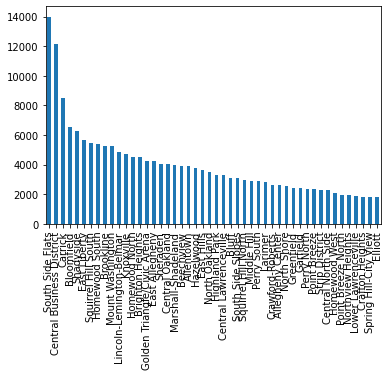

In [7]:
print('Highest crime rates',plot2.plot.bar())

We determined Squirrel Hill North as the best Neighborhood since it is 4th best in population, 4th best in trees, and is only the 29th highest in crime rates. From this it is easy to see why it is the best it has the best population to crime ratio and has some very nice trees in the area.

# Conclusion

Isaac Bredbenner: I did not have a favorite neighborhood in Pittsburgh before this project so our finding that Squirrel Hill North is the best neighborhood
is not really the same or different. It was just cool looking at how our different datasets combined to help us come to a result. I guess
that after this project my favorite Pittsburgh neighborhood will be Squirrel Hill North.

Justin Booth: We picked Squirrel Hill North as the best Neighborhood, but it is not my favorite Neighborhood in Pittsburgh. It would be where I am from White Hall which is a suburb of Pittsburgh. But since the data does not count those Neighborhoods, then I guess Squirrel Hill North is cool. We found this to be the case since its population was high and the crime rate ratio from it was low since it is only the 29th highest. Plus it had some great trees.

Kevin Fung: we were able to find and determine the best neighborhood by weighing in all of our datasets.  In the end, we came to the conclusion that the best neighborhood is Squirrel Hill North.  For me, this is my favorite neighborhood in Pittsburgh.  I haven't explored much of Pittsburgh yet in my first year, but the places I have been, Squirrel Hill North is one of my favorites.